# EFFICIENTNET- Pretrained

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# PARAMETER
IMG_SIZE = (96, 96)
BATCH_SIZE = 32
EPOCHS = 10

TRAIN_DIR = "../dataset_split/train"
VAL_DIR   = "../dataset_split/val"

# DATA GENERATOR
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# EFFICIENTNETB0
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(96, 96, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)   # head kecil
x = Dropout(0.3)(x)

output = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# COMPILE
model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Found 6941 images belonging to 5 classes.
Found 2117 images belonging to 5 classes.


c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.ven\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 96, 96, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 96, 96, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 96, 96, 3) │          0 │ normalization[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 48, 48,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 48, 48,    │        512 │ block1a_se_excit

 Total params: 4,131,880 (15.76 MB)

 Trainable params: 82,309 (321.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [3]:
# TRAINING
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# SAVE MODEL
model.save("../models/efficientnetb0_96.h5")

Epoch 1/10
 32/217 ━━━━━━━━━━━━━━━━━━━━ 33s 180ms/step - accuracy: 0.2115 - loss: 1.7244

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.ven\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


142/217 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.3873 - loss: 1.4617

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.ven\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


217/217 ━━━━━━━━━━━━━━━━━━━━ 56s 231ms/step - accuracy: 0.6535 - loss: 1.0042 - val_accuracy: 0.9188 - val_loss: 0.4200
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 45s 210ms/step - accuracy: 0.8904 - loss: 0.4035 - val_accuracy: 0.9580 - val_loss: 0.2046
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 48s 219ms/step - accuracy: 0.9278 - loss: 0.2639 - val_accuracy: 0.9669 - val_loss: 0.1416
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 50s 231ms/step - accuracy: 0.9402 - loss: 0.2089 - val_accuracy: 0.9721 - val_loss: 0.1141
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 50s 230ms/step - accuracy: 0.9503 - loss: 0.1728 - val_accuracy: 0.9773 - val_loss: 0.0892
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 50s 232ms/step - accuracy: 0.9562 - loss: 0.1498 - val_accuracy: 0.9783 - val_loss: 0.0807
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 51s 234ms/step - accuracy: 0.9617 - loss: 0.1300 - val_accuracy: 0.9811 - val_loss: 0.0698
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 54s 249ms/step - accuracy: 0.9637 - loss: 0.1237 - val

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

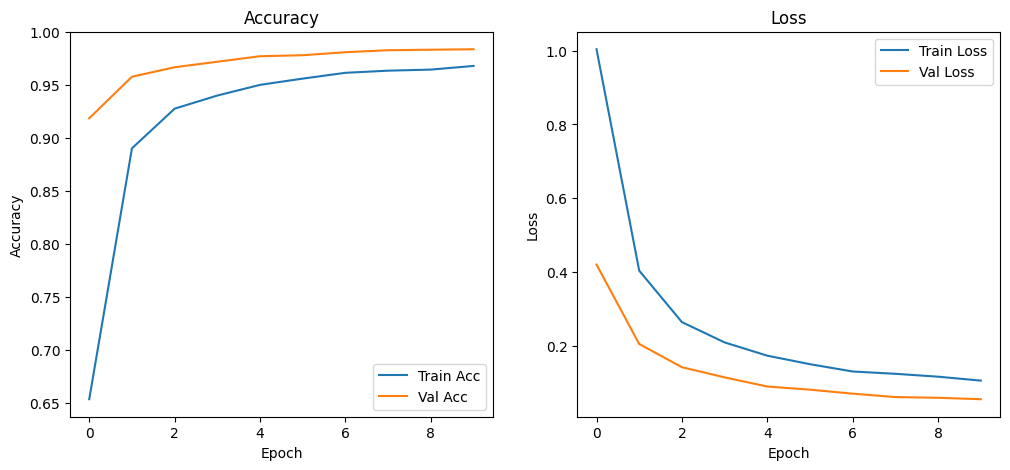

In [10]:
# Grafik Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

11/67 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step

c:\Users\ASUS\UJIAN AKHIR PRAKTIKUM MACHINE LEARNING (ML)\.ven\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step


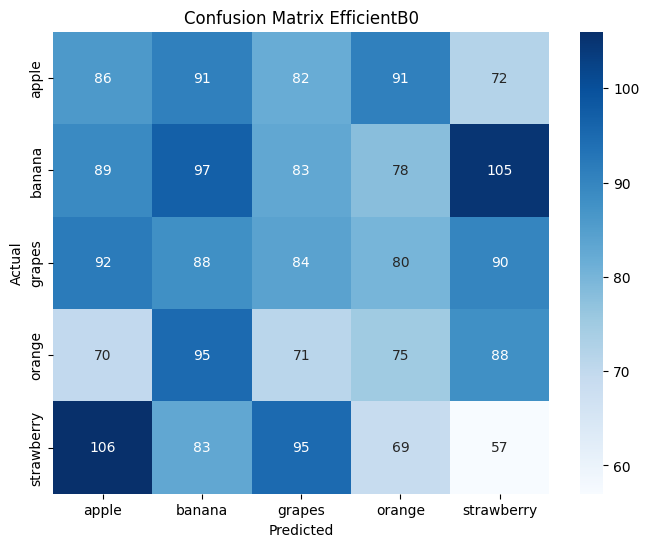

=== Classification Report EfficientB0 ===
              precision    recall  f1-score   support

       apple       0.19      0.20      0.20       422
      banana       0.21      0.21      0.21       452
      grapes       0.20      0.19      0.20       434
      orange       0.19      0.19      0.19       399
  strawberry       0.14      0.14      0.14       410

    accuracy                           0.19      2117
   macro avg       0.19      0.19      0.19      2117
weighted avg       0.19      0.19      0.19      2117



In [12]:
# CONFUSION MATRIX & CLASSIFICATION REPORT

# Predict
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix EfficientB0")
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("=== Classification Report EfficientB0 ===")
print(report)